# Decision_Tree & Random_Forest
## Fraud_check


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib


C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Using matplotlib backend: Qt5Agg


### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\Decision_Tree & Random_Forest\Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### EDA

In [4]:
tax_in = df['Taxable.Income']
lst = []
for i in tax_in:
    if i<= 30000:
        lst.append('Risky')
    else:
        lst.append('Good')

In [5]:
Tax_income = pd.DataFrame(lst)


In [6]:
df = pd.concat([Tax_income,df],axis=1)


In [7]:
from sklearn import preprocessing

In [8]:
label = preprocessing.LabelEncoder()
df['0']= label.fit_transform(df[0],)
df.drop([0],axis=1,inplace=True)

In [9]:
# one hot encoding
df = pd.get_dummies(df, prefix=['Undergrad', 'Marital.Status','Urban'])

In [10]:
X = df.drop('0',axis=1)
y = df['0']

## Decision Tree
### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [12]:
#c5.0
from sklearn.tree import DecisionTreeClassifier
model_c5 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_c5.fit(X_train,y_train)


C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 30041.5\nentropy = 0.734\nsamples = 480\nvalue = [381, 99]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 99\nvalue = [0, 99]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 381\nvalue = [381, 0]')]

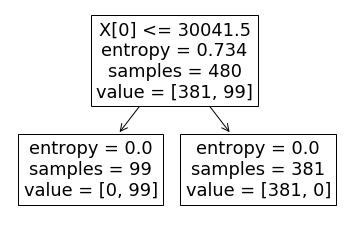

In [13]:
#Tree
from sklearn import tree
tree.plot_tree(model_c5)

### Model Evaluation

In [14]:
pred = model_c5.predict(X_test)

In [16]:
print('Accuracy: ',np.mean(pred==y_test)*100)

Accuracy:  100.0


In [17]:
#CART
model_cart = DecisionTreeClassifier(criterion='gini',max_depth=3)
model_cart.fit(X_train,y_train)

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
pred_cart = model_cart.predict(X_test)


In [19]:
print('Accuracy: ',np.mean(pred_cart==y_test)*100)

Accuracy:  100.0


## Random Forest 

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_features=10)
model.fit(X_train,y_train)

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
pred_rf = model.predict(X_test)

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [22]:
print('Accuracy: ',np.mean(y_test==pred_rf)*100)

Accuracy:  100.0
